In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path=pathlib.Path('/media/tris/tris_files/era-for-bw')
path

PosixPath('/media/tris/tris_files/era-for-bw')

In [4]:
df = pd.read_csv(path/'labels_proc.csv')
df.tail()

,file_name,valence,arousal,dominance,liking
1275,s32_t36,0.434444,0.773333,0.646667,0.346667
1276,s32_t37,0.312222,0.681111,0.673333,0.115556
1277,s32_t38,0.338889,0.778889,0.566667,0.122222
1278,s32_t39,0.443333,0.796667,0.538889,0.111111
1279,s32_t40,0.794444,0.447778,1.000000,0.208889


In [5]:
# np.random.seed(60)
# src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
#        .split_by_rand_pct(0.2)
#        .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
#        .transform()
#        .databunch(bs=10).normalize(imagenet_stats))

In [6]:
#np.random.seed(60)
src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
       .transform()
       .databunch(bs=4)
       .normalize())

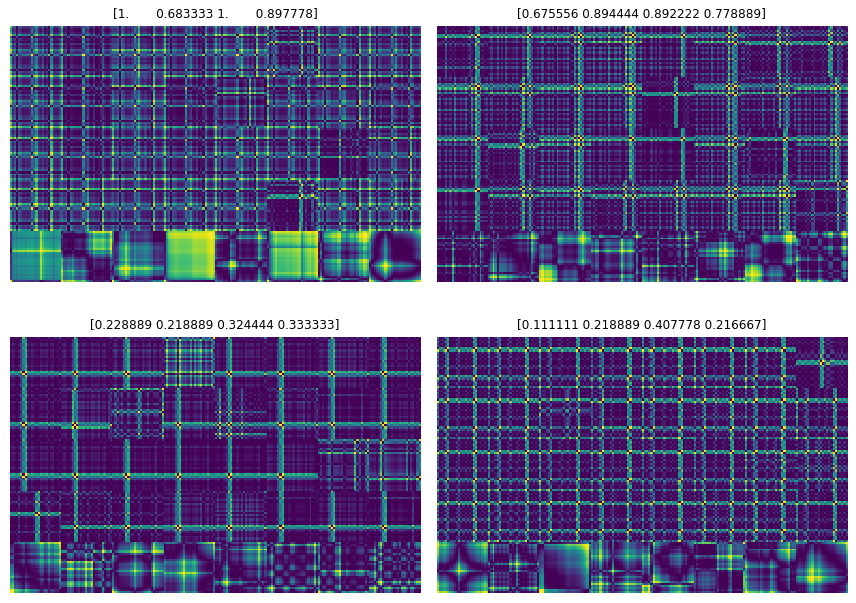

In [7]:
src.show_batch(rows=2, figsize=(12,9))

In [8]:
learn = cnn_learner(src, models.resnet34, metrics=[root_mean_squared_error], loss_func=MSELossFlat())
#learn = unet_learner(src, models.resnet18, metrics=[root_mean_squared_error], y_range=(0,1), loss_func=MSELossFlat())

In [9]:
learn.summary()

RuntimeError: CUDA out of memory. Tried to allocate 14.00 MiB (GPU 0; 5.80 GiB total capacity; 343.13 MiB already allocated; 14.12 MiB free; 370.00 MiB reserved in total by PyTorch)

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


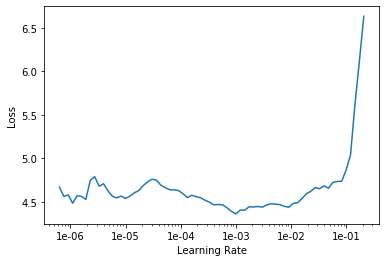

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
lr = 1e-1

In [12]:
learn.fit_one_cycle(5, slice(lr), wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1.017809,0.078422,0.276680,01:04
1,0.131892,0.063401,0.247902,01:04
2,0.067782,0.060989,0.242951,01:04
3,0.060602,0.054907,0.231343,01:04
4,0.057974,0.054865,0.230946,01:04


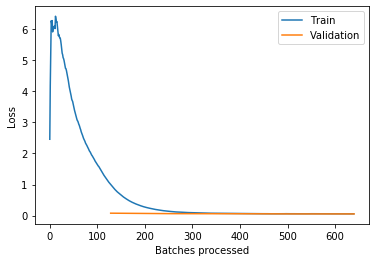

In [13]:
learn.recorder.plot_losses()

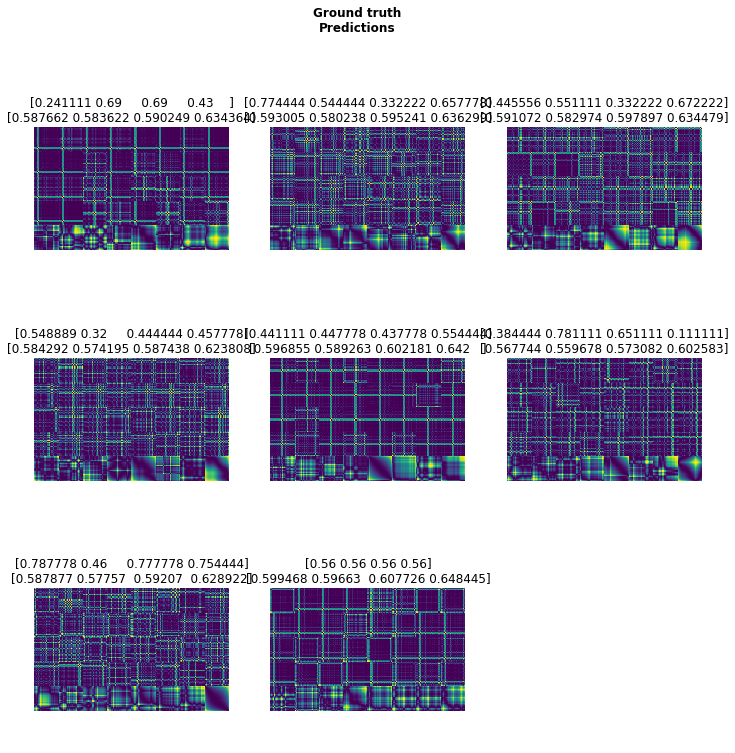

In [14]:
learn.show_results()